## INTRODUCTION

The assignment is to create a model that predict the churning or exist of customers from the bank. I will use Neural network to create the model.
Since its a classification I have split the data into two:
 1. ### Features
 
 * CreditScore
 * Geography
 * Gender
 * Age
 * Tenure
 * Balance
 * NumOfProducts
 * HasCrCard
 * IsActiveMember
 * EstimatedSalary
 
 2. ### Label
 
 * Exited
 
 I have 10,0000 bank accounts, I will split data into Test (20%) and train (80%)

In [1]:
## importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import graphviz
from keras.utils.vis_utils import plot_model
from ann_visualizer.visualize import ann_viz
import pydotplus
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [2]:
## importing the churning data
data = pd.read_csv("C:\\Users\\simon.waweru\\Downloads\\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## UNDERSTANDING THE DATASET

In [3]:
# Statistically ddescribing the data
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
# the information of the data, we can see that the data has no missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<AxesSubplot:xlabel='Age', ylabel='Balance'>

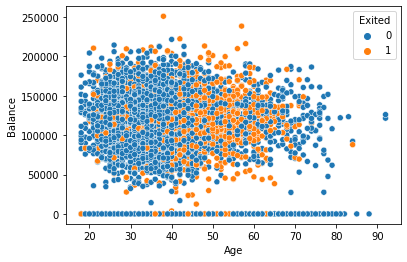

In [6]:
## creating  the scatterplot to understand the data
sns.scatterplot(data=data,x='Age',y='Balance',hue='Exited')

From the scatterplot we discover that most of the customers who existed  were above the age of 40 and a low to middle bank balance

In [7]:
## the value countfor churning label

data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
## remove unwanted columns
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# splitting the data into features and labels
#x as the features
#y as the labels
x=data.drop('Exited',axis=1)
y=data['Exited']

In [9]:
## encoding the categorical variable
from sklearn.preprocessing import OrdinalEncoder
## we only apply the ordinal encoder to gender columns
ordinal_encoder=OrdinalEncoder()
x[['Gender']] = ordinal_encoder.fit_transform(x[['Gender']]).astype('int')
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [10]:
###For Geography column because there are 3 unique values, we will use OneHotEncoder. 
#One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data.
column_label = list (x.columns)
column_label.remove('Geography')
list_geography = list(x['Geography'].unique())
list_geography.sort()
col_lbl=list_geography + column_label
print(col_lbl)

['France', 'Germany', 'Spain', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
encode = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])],remainder = 'passthrough')
x=pd.DataFrame(encode.fit_transform(x))
x.columns=col_lbl
x.head()

,France,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [12]:
from sklearn.preprocessing import StandardScaler
# Scaling with StandardScaler (Standardization)
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


In [13]:
## splitting the dataset 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
## split datseset into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state =123)
print('dataset training')
print(x_train.shape)
print(y_train.shape)
print('dataset testing')
print(x_test.shape)
print(y_test.shape)

dataset training
(8000, 12)
(8000,)
dataset testing
(2000, 12)
(2000,)


In [14]:
from sklearn.preprocessing import StandardScaler

# Scaling with StandardScaler (Standardization)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train)

[[ 1.002002   -0.57946723 -0.57677292 ...  0.64298333  0.97067965
  -0.79223731]
 [ 1.002002   -0.57946723 -0.57677292 ...  0.64298333 -1.030206
   0.57024329]
 [-0.998002   -0.57946723  1.73378459 ... -1.55525028 -1.030206
  -0.31968114]
 ...
 [ 1.002002   -0.57946723 -0.57677292 ...  0.64298333 -1.030206
  -1.06263427]
 [ 1.002002   -0.57946723 -0.57677292 ...  0.64298333  0.97067965
   1.1409838 ]
 [ 1.002002   -0.57946723 -0.57677292 ...  0.64298333 -1.030206
  -1.58131877]]


BUILDING ANN Model

For building the ANN, We use Keras from Tensorflow. We use Sequential class starting from input layer, 2 hidden layer and a output layer.

Activation functions used are Relu and Sigmoid functions. Hidden layers draws samples from uniform disribution (he_uniform and glorot_uniform).

Adam's Gradient Descent used as Optimizer and Binary cross entropy used as loss function.

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()
# add first hidden layer
ann.add(Dense(units=16, activation='relu'))
# add second hidden layer
ann.add(Dense(units=32, activation='relu'))
# add output layer
ann.add(Dense(units=1, activation='sigmoid'))
# Compiling the model with adam as optimizer,
# binary_crossentropy as loss function
# for metrics we use accuracy
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the Model
trained_model=ann.fit(x_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.4893 - accuracy: 0.7840
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4241 - accuracy: 0.8166
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4009 - accuracy: 0.8266
Epoch 4/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3768 - accuracy: 0.8440
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3594 - accuracy: 0.8515
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3505 - accuracy: 0.8575
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3464 - accuracy: 0.8605
Epoch 8/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3420 - accuracy: 0.8605
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3399 - accuracy: 0.8610
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3373 - accura

TEST THE MODEL.
After the model is trained, we will predict the test dataset and find out the accuracy.
The number of prediction results is the percentage of data to the True / 1 value. 
So the closer to 1 the higher the percentage to produce a True value.

## POST PROCESSING

In [20]:
# Predict test set
from sklearn.metrics import classification_report
y_pred = ann.predict(x_test)
y_pred = np.round(y_pred)
print('Classification Report: \n', classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1586
           1       0.74      0.47      0.58       414

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



As we can see from the classification report, both exited and non-exited F1score are kind of equal, so we trained them with equal importance. And also we got descent accuracy OF 86%.

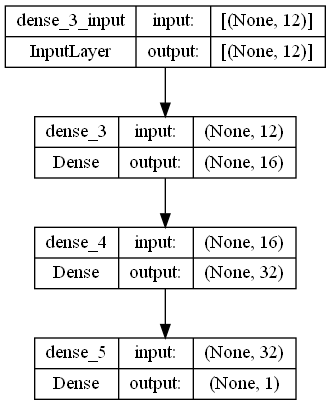

In [21]:
## plotting the model
plot_model(ann,to_file='ann_plot.png',show_shapes=True,show_layer_names=True)

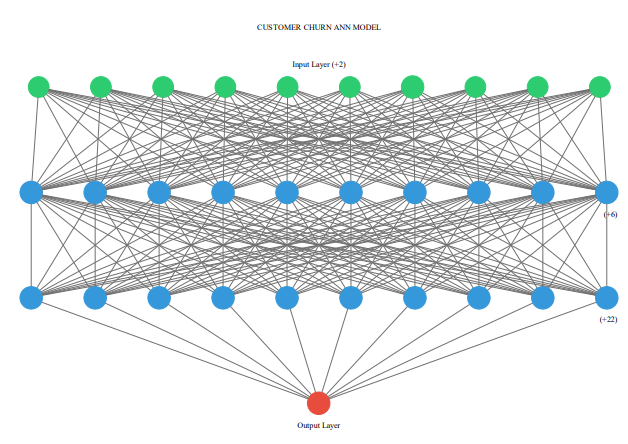

In [33]:
## visualizing the model structure  
ann_viz(ann,view=True, title= 'CUSTOMER CHURN ANN MODEL')
## Displaying the  visualization
from IPython.display import display
from PIL import Image
img_PIL = Image.open("C:\\Users\\simon.waweru\\Desktop\\Screenshot 2022-11-01 055138.png")
display(img_PIL)

In [39]:
## testing the accuracy of the model
accuracy= ann.evaluate(x_test,y_test)
accuracy

63/63 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8560


[0.34714919328689575, 0.8560000061988831]

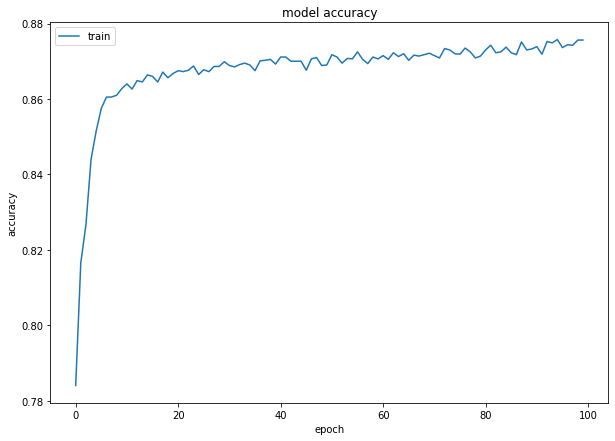

In [40]:
# summarize for train and test accuracy
plt.figure(figsize=(10, 7))
plt.plot(trained_model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

From the zero epoch the accuracy increase sharply but do not reach a 100, hench shows that the neural net is learning very fast

In [43]:
### SAVING OUR MODEL TO JSON FOR DEPLOYMENT
model_json =  ann.to_json()
with open("ann.json","w") as json_file:
    json_file.write(model_json)
ann.save_weights("C:\\Users\\simon.waweru\\Desktop\\model.h5")
